# Importing Libraries

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


# Data loading and preprocessing

In [10]:
# Load dataset
data = pd.read_csv("AEP_hourly.csv/AEP_hourly.csv")

# Data preprocessing
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)


# EDA

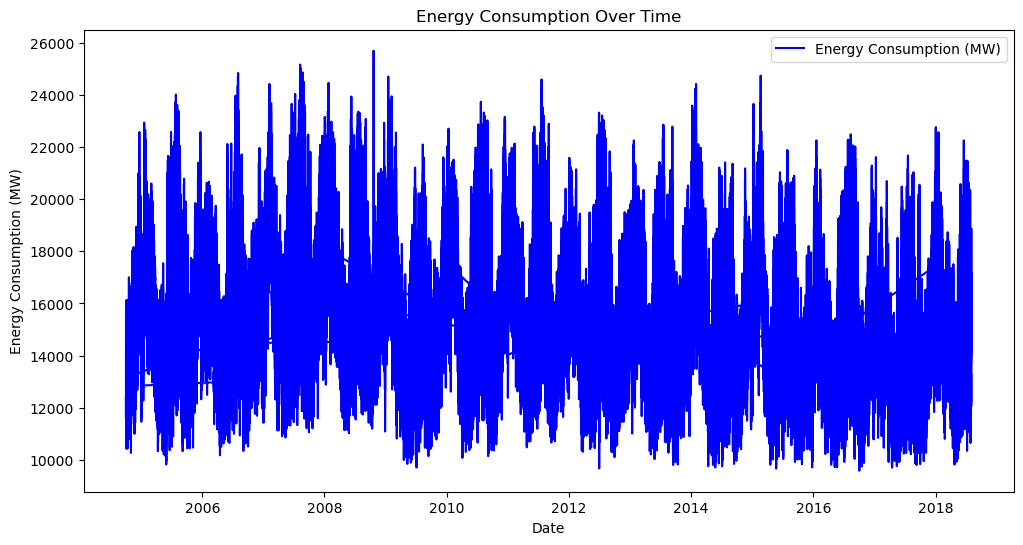

In [11]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AEP_MW'], label='Energy Consumption (MW)', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


# Data normalization

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

In [13]:
train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

In [14]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [15]:
time_step = 30

In [16]:
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Training

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\RAHULSRI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 104s 34ms/step - loss: 7.4839e-04
Epoch 2/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 105s 35ms/step - loss: 6.0251e-04
Epoch 3/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 104s 34ms/step - loss: 5.2660e-04
Epoch 4/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 104s 34ms/step - loss: 4.8568e-04
Epoch 5/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 104s 34ms/step - loss: 4.6654e-04
Epoch 6/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 97s 32ms/step - loss: 4.6449e-04
Epoch 7/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 102s 34ms/step - loss: 4.3592e-04
Epoch 8/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 102s 34ms/step - loss: 4.3699e-04
Epoch 9/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 101s 33ms/step - loss: 4.0973e-04
Epoch 10/10
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 103s 34ms/step - loss: 4.1015e-04


# Predictions

In [21]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


3031/3031 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step


In [22]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [23]:
train_rmse = np.sqrt(mean_squared_error(data.values[time_step:train_size], train_predictions))
test_rmse = np.sqrt(mean_squared_error(data.values[train_size + time_step:], test_predictions))

In [24]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 324.66582643831396
Test RMSE: 336.2120683912848


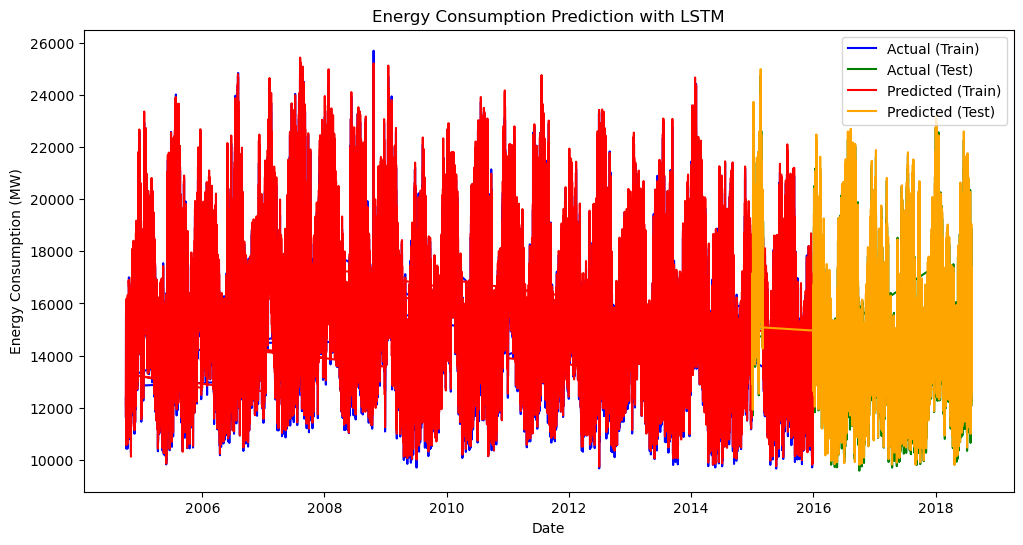

In [25]:
# Plot training and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[time_step:train_size], data['AEP_MW'].values[time_step:train_size], label='Actual (Train)', color='blue')
plt.plot(data.index[train_size + time_step:], data['AEP_MW'].values[train_size + time_step:], label='Actual (Test)', color='green')
plt.plot(data.index[time_step:train_size], train_predictions, label='Predicted (Train)', color='red')
plt.plot(data.index[train_size + time_step:], test_predictions, label='Predicted (Test)', color='orange')
plt.title('Energy Consumption Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()
